# Оценка результатов A/B-теста

Вместе с отделом маркетинга подготовлен список гипотез для увеличения выручки интернет-магазина.

Необходимо приоритизировать гипотезы, запустить A/B-тест и проанализировать результаты.

Исходные данные:
1. Файл с описанием девяти гипотез и информацией для приоритизации (hypothesis.csv)
- Hypothesis — краткое описание гипотезы;
- Reach — охват пользователей по 10-балльной шкале;
- Impact — влияние на пользователей по 10-балльной шкале;
- Confidence — уверенность в гипотезе по 10-балльной шкале;
- Efforts — затраты ресурсов на проверку гипотезы по 10-балльной шкале. Чем больше значение Efforts, тем дороже проверка гипотезы;

2. Файлы с результатами A/B-теста (orders.csv, visitors.csv)

2.1. Информация о заказах
- transactionId — идентификатор заказа;
- visitorId — идентификатор пользователя, совершившего заказ;
- date — дата, когда был совершён заказ;
- revenue — выручка заказа;
- group — группа A/B-теста, в которую попал заказ;

2.2. Информация о группах
- date — дата;
- group — группа A/B-теста;
- visitors — количество пользователей в указанную дату в указанной группе A/B-теста.

План анализа:
1. Приоритизация гипотез - выявление приоритетных гипотез.
2. Анализ результатов A/B-теста - выручки, среднего чека, количества заказов по группам, построение графиков и расчет статистической значимости различий.
3. Принятие решения по результатам теста.

# Часть 1. Приоритизация гипотез

**Задача**
- Применить фреймворк ICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Применить фреймворк RICE для приоритизации гипотез. Отсортировать их по убыванию приоритета.
- Указать, как изменилась приоритизация гипотез при применении RICE вместо ICE. Объяснить, почему так произошло.

Импорт библиотек

In [1]:
import pandas as pd
from scipy import stats as st
import numpy as np
from matplotlib import pyplot as plt

Загрузка данных о гипотезах

In [2]:
hypothesis = pd.read_csv('hypothesis.csv')

In [3]:
pd.options.display.max_colwidth = 130
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5


Фреймворки ICE и RICE являются способами приоритизации задач. Они позволяют выявить наиболее приоритетные задачи на основании параметров, каждому из которых ставят оценку, например от 1 до 10.<br>

ICE учитывает параметры impact (эффект), confidence (уверенность), effort (усилия), RICE дополнительно учитывает reach (охват).<br>

Итоговая оценка приоритета вычисляется по формуле (Reach) x Impact x confidence / effor.

Расчет ICE и RICE

In [4]:
hypothesis['ice'] = round(hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)

In [5]:
hypothesis['rice'] = round(
    hypothesis['Reach'] * hypothesis['Impact'] * hypothesis['Confidence'] / hypothesis['Efforts'], 2)
display(hypothesis)

,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2


In [6]:
print('Приоритизация способом ICE:')
display(hypothesis.sort_values(by='ice', ascending=False))

Приоритизация способом ICE:


,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


In [7]:
print('Приоритизация способом RICE:')
display(hypothesis.sort_values(by='rice', ascending=False))

Приоритизация способом RICE:


,Hypothesis,Reach,Impact,Confidence,Efforts,ice,rice
7,"Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок",10,7,8,5,11.20,112.0
2,"Добавить блоки рекомендаций товаров на сайт интернет магазина, чтобы повысить конверсию и средний чек заказа",8,3,7,3,7.00,56.0
0,"Добавить два новых канала привлечения трафика, что позволит привлекать на 30% больше пользователей",3,10,8,6,13.33,40.0
6,"Показать на главной странице баннеры с актуальными акциями и распродажами, чтобы увеличить конверсию",5,3,8,3,8.00,40.0
8,"Запустить акцию, дающую скидку на товар в день рождения",1,9,9,5,16.20,16.2
3,"Изменить структура категорий, что увеличит конверсию, т.к. пользователи быстрее найдут нужный товар",8,3,3,8,1.12,9.0
1,"Запустить собственную службу доставки, что сократит срок доставки заказов",2,5,4,10,2.00,4.0
5,"Добавить страницу отзывов клиентов о магазине, что позволит увеличить количество заказов",3,2,2,3,1.33,4.0
4,"Изменить цвет фона главной страницы, чтобы увеличить вовлеченность пользователей",3,1,1,1,1.00,3.0


Способ приоритизации гипотез RICE отличается от ICE учетом охвата пользователей.<br>

Без учета охвата наибольшим приоритетом обладает гипотеза "Скидка в день рождения". Но день рождения бывает только раз в году, в связи с чем охват пользователей (в отдельный момент времени) минимален.<br>

С учетом показателя охвата пользователей приоритетной гипотезой является "Добавить форму подписки на все основные страницы, чтобы собрать базу клиентов для email-рассылок".

# Часть 2. Анализ A/B-теста

**Задача**<br>
Проанализировать A/B-тест:
1.	Построить график кумулятивной выручки по группам.
2.	Построить график кумулятивного среднего чека по группам.
3.	Построить график относительного изменения кумулятивного среднего чека группы B к группе A.
4.	Построить график кумулятивного среднего количества заказов на посетителя по группам.
5.	Построить график относительного изменения кумулятивного среднего количества заказов на посетителя группы B к группе A.
6.	Построить точечный график количества заказов по пользователям.
7.	Посчитать 95-й и 99-й перцентили количества заказов на пользователя. Выбрать границу для определения аномальных пользователей.
8.	Построить точечный график стоимостей заказов.
9.	Посчитать 95-й и 99-й перцентили стоимости заказов. Выбрать границу для определения аномальных заказов.
10.	Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным.
11.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «сырым» данным.
12.	Посчитать статистическую значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным.
13.	Посчитать статистическую значимость различий в среднем чеке заказа между группами по «очищенным» данным.
14.	Принять решение по результатам теста. Варианты решений: 1. Остановить тест, зафиксировать победу одной из групп. 2. Остановить тест, зафиксировать отсутствие различий между группами. 3. Продолжить тест.

Загрузка данных о результатах A/B-теста

In [8]:
orders = pd.read_csv('orders.csv')

In [9]:
display(orders.sample(5))

,transactionId,visitorId,date,revenue,group
300,630178370,2845785181,2019-08-18,2342,A
1074,3571123442,457167155,2019-08-12,1280,B
893,3390166538,329726006,2019-08-21,4188,A
425,590470918,1920142716,2019-08-19,1294500,B
1172,3898641900,3803269165,2019-08-14,790,B


In [10]:
visitors = pd.read_csv('visitors.csv')

In [11]:
display(visitors.sample(5))

,date,group,visitors
36,2019-08-06,B,655
50,2019-08-20,B,560
7,2019-08-08,A,610
58,2019-08-28,B,654
46,2019-08-16,B,413


## Изучение и предобработка данных

In [12]:
#проверка наличия явных дубликатов
print('Количество дубликатов в orders:', orders.duplicated().sum())
print('Количество дубликатов в visitors:', visitors.duplicated().sum())

Количество дубликатов в orders: 0
Количество дубликатов в visitors: 0


In [13]:
#информация о таблице, в т.ч. о пропусках
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   transactionId  1197 non-null   int64 
 1   visitorId      1197 non-null   int64 
 2   date           1197 non-null   object
 3   revenue        1197 non-null   int64 
 4   group          1197 non-null   object
dtypes: int64(3), object(2)
memory usage: 46.9+ KB


In [14]:
visitors.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   date      62 non-null     object
 1   group     62 non-null     object
 2   visitors  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.6+ KB


Пропусков нет, столбцы с датами необходимо привести к формату дат.

In [15]:
orders['date'] = pd.to_datetime(orders['date'])
visitors['date'] = pd.to_datetime(visitors['date'])

In [16]:
display(orders.sample())
display(visitors.sample())

,transactionId,visitorId,date,revenue,group
799,724544405,2572433473,2019-08-05,2436,B


,date,group,visitors
11,2019-08-12,A,595


A/B-тест подразумевает разделение пользователей на две равные группы.<br>
Если пользователь был в обеих группах в ходе одного исследования, неизвестно, какая из них повлияла на его решения.


Проверим равенство и изолированность групп:

In [17]:
#Равенство групп подразумевает одинаковое количество уникальных пользователей
print('Размер группы A:', orders[orders['group']=='A']['visitorId'].nunique())
print('Размер группы B:', orders[orders['group']=='B']['visitorId'].nunique())
print('Относительная разница групп A и B, %:', 
      round(100 - orders[orders['group']=='A']['visitorId'].nunique() / 
            orders[orders['group']=='B']['visitorId'].nunique() * 100, 2))

Размер группы A: 503
Размер группы B: 586
Относительная разница групп A и B, %: 14.16


In [18]:
print('Количество пользователей, находящихся сразу в двух группах:', 
     (pd.Series(orders[orders['group']=='A']['visitorId'].unique())
      .isin(pd.Series(orders[orders['group']=='B']['visitorId'].unique()))
      ).sum()
)

Количество пользователей, находящихся сразу в двух группах: 58


Удалим таких пользователей:

In [19]:
ab_list = orders.groupby('visitorId', as_index=False).agg({'group':'nunique'})
ab_list.head()

,visitorId,group
0,5114589,1
1,6958315,1
2,8300375,2
3,11685486,1
4,39475350,1


In [20]:
a_and_b_list = ab_list[ab_list['group']==2]
a_and_b_list.head(2)

,visitorId,group
2,8300375,2
44,199603092,2


In [21]:
# Проверим, совпадает ли количество пользователей с ранее вычисленным
a_and_b_list['visitorId'].count()

58

In [22]:
# Удалим пользователей, находящихся сразу в двух группах
orders_ab = orders.query('visitorId not in @a_and_b_list.visitorId')

In [23]:
orders_ab

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [24]:
#Проверим, сколько пользователей удалено
print('Удалено уникальных пользователей:', orders['visitorId'].nunique() - orders_ab['visitorId'].nunique())

#Относительное изменение
print('Удалено уникальных пользователей, %:', 
      (round(100 - orders_ab['visitorId'].nunique() / orders['visitorId'].nunique() * 100, 2)))
print('Удалено записей, %:', 
      (round(100 - orders_ab['visitorId'].count() / orders['visitorId'].count() * 100, 2)))

Удалено уникальных пользователей: 58
Удалено уникальных пользователей, %: 5.63
Удалено записей, %: 15.12


In [25]:
# Проверим равенство групп после удаления части пользователей
print('Размер группы A:', orders_ab[orders_ab['group']=='A']['visitorId'].nunique())
print('Размер группы B:', orders_ab[orders_ab['group']=='B']['visitorId'].nunique())
print('Относительная разница групп A и B, %:', 
      round(100 - orders_ab[orders_ab['group']=='A']['visitorId'].nunique() / 
            orders_ab[orders_ab['group']=='B']['visitorId'].nunique() * 100, 2))

Размер группы A: 445
Размер группы B: 528
Относительная разница групп A и B, %: 15.72


In [26]:
print('Среднее количество записей (заказов) на одного пользователя:', 
      round(orders.groupby('visitorId')['transactionId'].count().mean(), 2))

Среднее количество записей (заказов) на одного пользователя: 1.16


In [27]:
# Заменим orders на orders_ab
orders = orders_ab

In [28]:
print('Начало теста:', orders['date'].dt.date.min())
print('Окончание теста:', orders['date'].dt.date.max())

Начало теста: 2019-08-01
Окончание теста: 2019-08-31


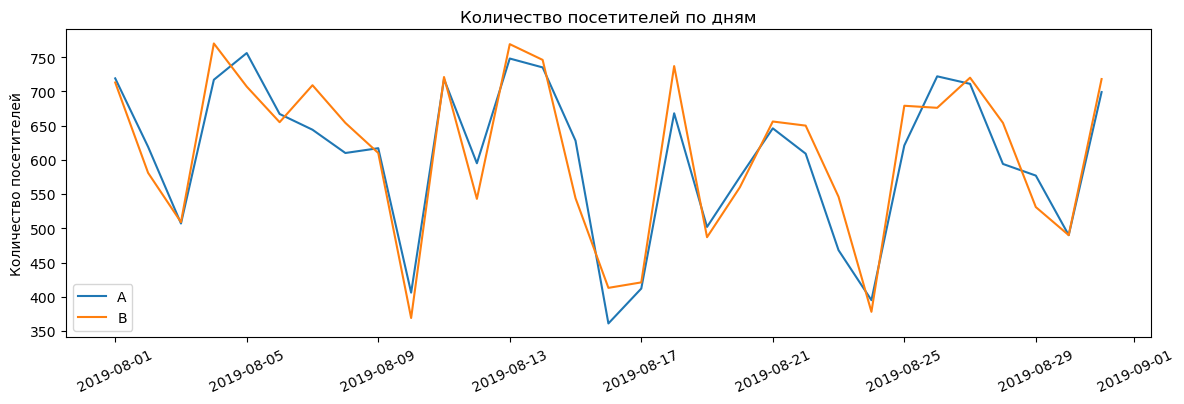

In [29]:
plt.figure(figsize=(14,4))
# посетители в группе А
plt.plot(visitors[visitors['group']=='A']['date'], visitors[visitors['group']=='A']['visitors'], label='A')
# посетители в группе B
plt.plot(visitors[visitors['group']=='B']['date'], visitors[visitors['group']=='B']['visitors'], label='B')

plt.title('Количество посетителей по дням')
plt.ylabel('Количество посетителей')
plt.xticks(rotation=25)
plt.legend()
plt.show()

**Вывод:** в ходе первичного анализа данных было выявлено наличие пользователей, находящихся сразу в двух группах. Наличие таких пользователей может исказить результаты A/B-теста, поскольку неизвестно, нахождение в какой из групп повлияло на решения пользователя. Следовательно, указанных пользователей необходимо удалить в целях устранения неоднозначности.<br><br>
Количество таких пользователей: 58, что составляет 5,6% от общего числа пользователей. Количество сделанных такими пользователями заказов (записей в таблице) составляет 15% от общего числа заказов. То есть среднее количество заказов на пользователя превышает нормальное (по всем пользователям) значение в 2,7 раза.<br><br>
Количество пользователей, подлежащих удалению, относительно невелико, в отличие от связанных с ними записей. Однако, чем больше таких записей, тем больше оказываемый ими негативный эффект неоднозначности.<br><br>
Также выявлено несоответствие размеров групп А и В, достигающее 14% в исходных данных и 15,7% после удаления пользователей. Это может вносить дополнительные искажения в результаты.<br><br>
Тест проводился с 1 по 31 августа 2019 г.<br><br>
Динамика количества посетителей по дням совпадает в обеих группах и колеблется в диапазоне от 400 до 750 посетителей.

## Анализ A/B-теста

### Кумулятивная выручка

Соберем кумулятивные данные

In [30]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

In [31]:
dates_groups.head(4)

,date,group
55,2019-08-01,A
66,2019-08-01,B
175,2019-08-02,A
173,2019-08-02,B


In [32]:
# агрегированные кумулятивные (по дням) данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]\
    .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), 
    axis=1).sort_values(by=['date','group'])

In [33]:
orders_aggregated.head()

,date,group,transactionId,visitorId,revenue
55,2019-08-01,A,23,19,142779
66,2019-08-01,B,17,17,59758
175,2019-08-02,A,42,36,234381
173,2019-08-02,B,40,39,221801
291,2019-08-03,A,66,60,346854


In [34]:
# агрегированные кумулятивные (по дням) данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), 
    axis=1).sort_values(by=['date','group'])

In [35]:
visitors_aggregated.head()

,date,group,visitors
55,2019-08-01,A,719
66,2019-08-01,B,713
175,2019-08-02,A,1338
173,2019-08-02,B,1294
291,2019-08-03,A,1845


In [36]:
# объединим кумулятивные данные по заказам и посетителям в одну таблицу
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [37]:
cumulative_data.head()

,date,group,orders,buyers,revenue,visitors
0,2019-08-01,A,23,19,142779,719
1,2019-08-01,B,17,17,59758,713
2,2019-08-02,A,42,36,234381,1338
3,2019-08-02,B,40,39,221801,1294
4,2019-08-03,A,66,60,346854,1845


In [38]:
# проверка начала и окончания теста
print('Начало теста:', cumulative_data['date'].dt.date.min())
print('Окончание теста:', cumulative_data['date'].dt.date.max())

Начало теста: 2019-08-01
Окончание теста: 2019-08-31


Датафрейм cumulative_data создан корректно, даты начала и окончания теста совпадают с исходными данными.

Построим график кумулятивной выручки по группам

In [39]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

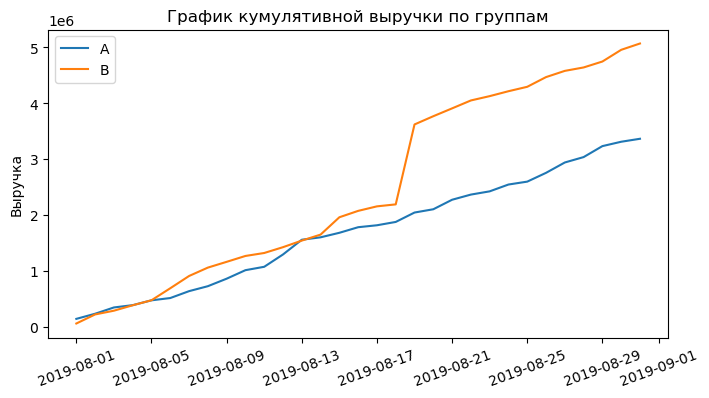

In [40]:
plt.figure(figsize=(8,4))
# график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=20)
plt.legend()
plt.show()

Вывод: лидер по выручке - группа B. В районе 17.08.2019 в группе B  виден аномалный рост выручки. Динамика выручки в группах положительная.<br>

Поскольку выручка зависит от количества проданного товара и его цены, резкий рост выручки может быть спровоцирован аномальным краткосрочным наплывом покупателей, либо продажей дорогого товара.

### Кумулятивный средний чек

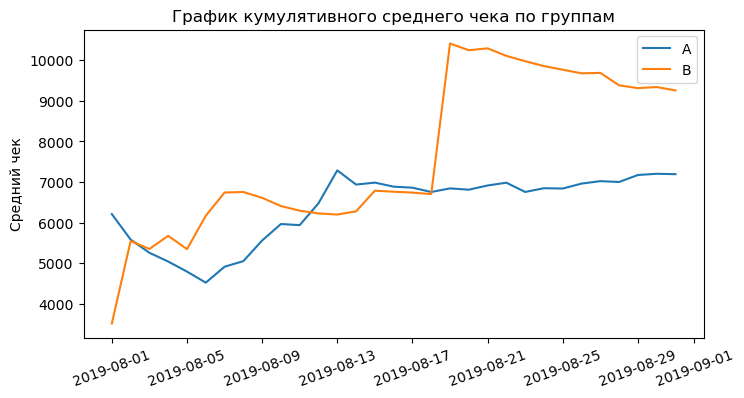

In [41]:
plt.figure(figsize=(8,4))
# график чека группы А
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
# график чека группы В
plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xticks(rotation=20)
plt.legend()
plt.show()

Вывод: в группе В опять виден резкий скачек среднего чека, что не позволяет сделать однозначные выводы. Необходимо выявить и исключить аномалию, после чего повторить анализ.

### Относительное изменение кумулятивного среднего чека 

In [42]:
# кумулятивные данные по выручке и заказам для каждой группы
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, on='date', suffixes=['_a', '_b'])

In [43]:
print(merged_cumulative_revenue.head(3))

        date  revenue_a  orders_a  revenue_b  orders_b
0 2019-08-01     142779        23      59758        17
1 2019-08-02     234381        42     221801        40
2 2019-08-03     346854        66     288850        54


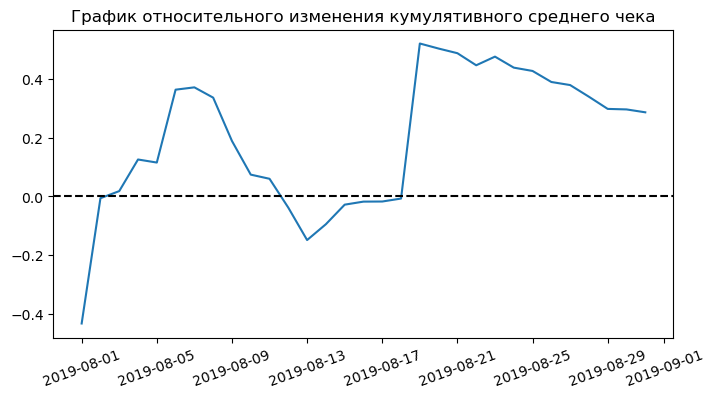

In [44]:
plt.figure(figsize=(8,4))
# график отношения средних чеков (B к A)
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b']) /
         (merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a']) -1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека')
plt.xticks(rotation=20)
plt.show()

Вывод: график неравномерен, присутствуют резкие взлеты и падения.

### Кумулятивное среднее количество заказов на посетителя 

In [45]:
# добавим в cumulative_date столбец со значениями кумулятивного среднего количества заказов 
#на посетителя
cumulative_data['ord/vis_rate'] = cumulative_data['orders']/cumulative_data['visitors']

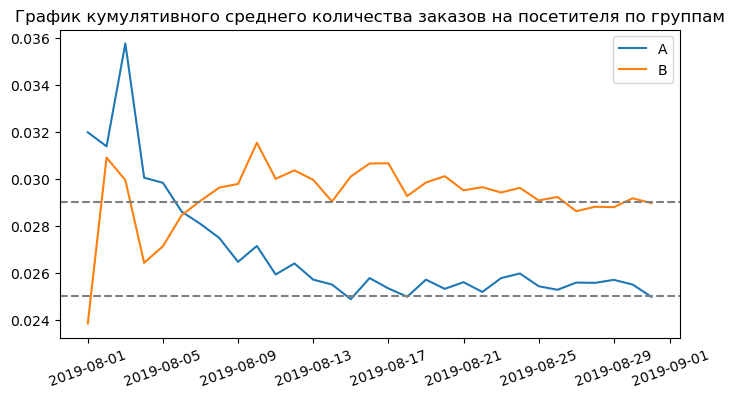

In [46]:
# строим график
plt.figure(figsize=(8,4))
plt.plot(cumulative_data[cumulative_data['group']=='A']['date'], 
         cumulative_data[cumulative_data['group']=='A']['ord/vis_rate'], label='A')
plt.plot(cumulative_data[cumulative_data['group']=='B']['date'], 
         cumulative_data[cumulative_data['group']=='B']['ord/vis_rate'], label='B')

plt.axhline(y=0.025, color='gray', linestyle='--')
plt.axhline(y=0.029, color='gray', linestyle='--')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=20)
plt.legend()
plt.show()

Вывод: графики стабилизировались на показателях около 0,025 заказа на посетителя в группе A и 0,029 заказа на посетителя в группе B.<br>

В начале теста оба графика показывают резкий рост, затем столь же резкое снижение, после чего график группы A продолжает снижение, а график группы B начинает расти. С 09.08.2019 графики начинают стабилизироваться.

### Относительное изменение кумулятивного среднего количества заказов на посетителя

In [47]:
# кумулятивные данные по среднему числу заказов на посетителя для каждой группы
merged_cumulative_o_v_rate = cumulative_data[cumulative_data['group']=='A'][['date', 'ord/vis_rate']].merge(
    cumulative_data[cumulative_data['group']=='B'][['date', 'ord/vis_rate']], on='date', suffixes=['_a', '_b'])

In [48]:
print(merged_cumulative_o_v_rate.head(3))

        date  ord/vis_rate_a  ord/vis_rate_b
0 2019-08-01        0.031989        0.023843
1 2019-08-02        0.031390        0.030912
2 2019-08-03        0.035772        0.029950


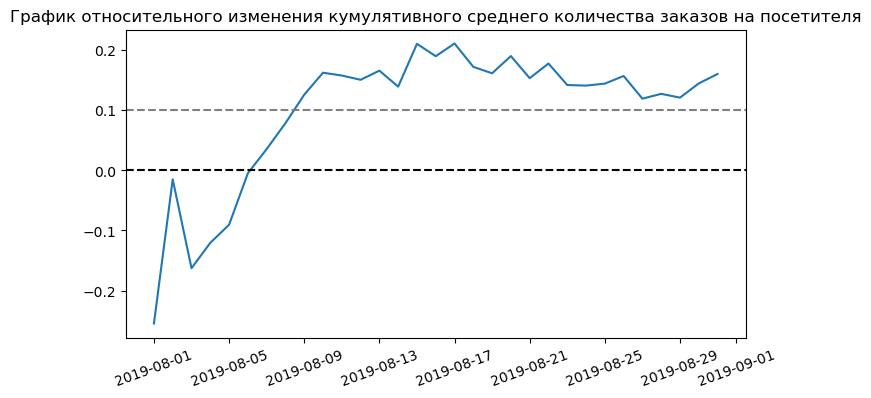

In [49]:
plt.figure(figsize=(8,4))
# график отношения кумулятивного среднего количества заказов на посетителя (B к A)
plt.plot(merged_cumulative_o_v_rate['date'], 
         merged_cumulative_o_v_rate['ord/vis_rate_b']/
         merged_cumulative_o_v_rate['ord/vis_rate_a'] -1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.1, color='gray', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.xticks(rotation=20)
plt.show()

Вывод: в начале теста группа B проигрывала, но затем вырвалась вперед и сохраняет лидерство, превосходя группу A на более чем 10%. После плавного снижения показателя до значения 0,1 наметился разворот.

### Точечный график количества заказов на пользователя

In [50]:
# таблица с количеством заказов по пользователям (покупателям) в обеих группах
orders_by_users = orders.groupby('visitorId', as_index=False).agg({'transactionId':'nunique'})
orders_by_users.columns = ['user_id', 'orders']

In [51]:
orders_by_users.head(2)

,user_id,orders
0,5114589,1
1,6958315,1


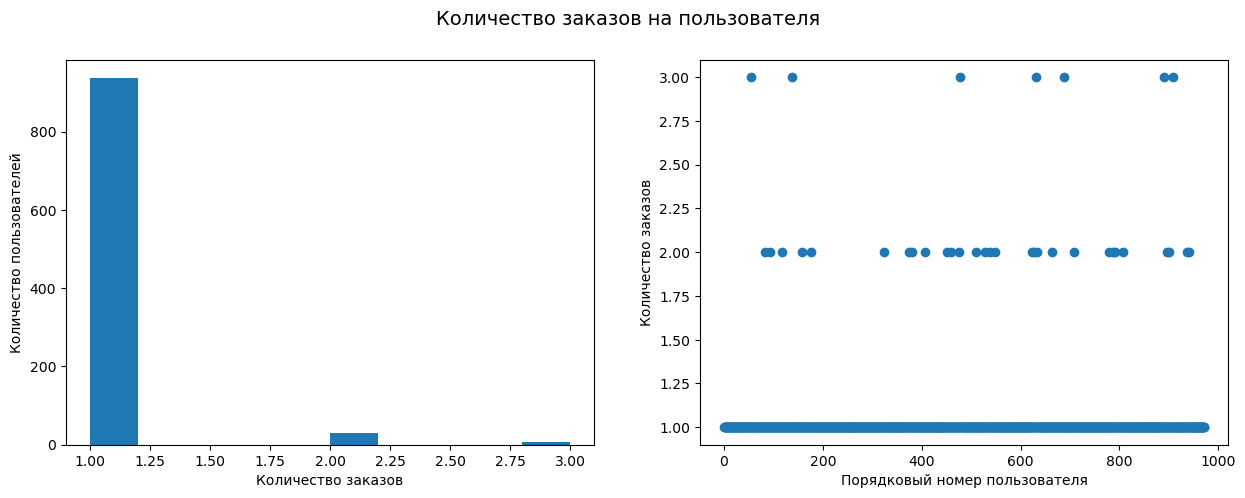

In [52]:
# построим гистограмму распределения, а также точечную диаграмму
plt.figure(figsize=(15,5))
plt.suptitle('Количество заказов на пользователя', fontsize=14)

ax1 = plt.subplot(1, 2, 1)
ax1.hist(orders_by_users['orders'])
plt.xlabel('Количество заказов')
plt.ylabel('Количество пользователей')

ax2 = plt.subplot(1, 2, 2)
x_values = pd.Series(range(0,len(orders_by_users)))
ax2.scatter(x_values, orders_by_users['orders'])
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Количество заказов')

plt.show()

Большинство пользователей делают 1 заказ.

### 95-й и 99-й перцентили количества заказов на пользователя

In [53]:
print(np.percentile(orders_by_users['orders'], [95, 99]))

[1. 2.]


Только 5% пользователей делают более одного заказа, 1% - более двух.

Примем за аномальное поведение наличие более чем двух заказов.

### Точечный график стоимостей заказов

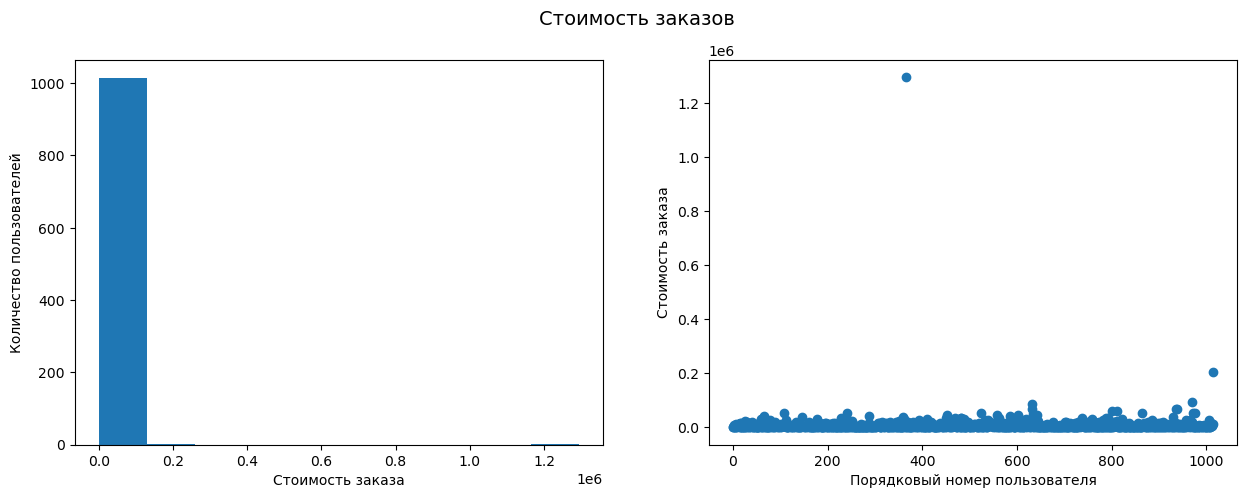

In [54]:
# построим гистограмму распределения, а также точечную диаграмму
plt.figure(figsize=(15,5))
plt.suptitle('Стоимость заказов', fontsize=14)

ax1 = plt.subplot(1, 2, 1)
ax1.hist(orders['revenue'])
plt.xlabel('Стоимость заказа')
plt.ylabel('Количество пользователей')

ax2 = plt.subplot(1, 2, 2)
x_values = pd.Series(range(0,len(orders['revenue'])))
ax2.scatter(x_values, orders['revenue'])
plt.xlabel('Порядковый номер пользователя')
plt.ylabel('Стоимость заказа')

plt.show()

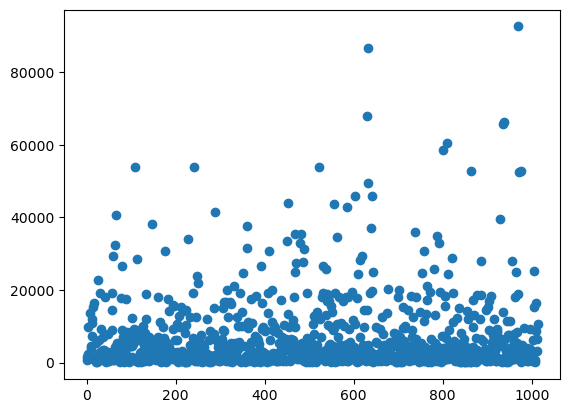

In [55]:
# до 200000
plt.scatter(pd.Series(range(0,len(orders[orders['revenue'] <= 200000]['revenue']))), 
            orders[orders['revenue'] <= 200000]['revenue']);

Сумма большинства заказов менее 60000 рублей. Виден один заказ на более чем миллион рублей.

### 95-й и 99-й перцентили стоимости заказов

In [56]:
print(np.percentile(orders['revenue'], [95, 99]))

[26785. 53904.]


Стоимость 5% заказов превышает 26785 руб., 1% - превышает 53904 руб.

Примем за аномальные заказы стоимостью более 35000 руб. Таких заказов больше 1%, но меньше 5%.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «сырым» данным

In [57]:
# таблицы пользователей и количества их заказов по группам
orders_by_a = orders[orders['group'] == 'A'].groupby('visitorId', as_index=False)\
              .agg({'transactionId': 'nunique'})
orders_by_a.columns = ['user_id', 'orders']

orders_by_b = orders[orders['group'] == 'B'].groupby('visitorId', as_index=False)\
              .agg({'transactionId': 'nunique'})
orders_by_b.columns = ['user_id', 'orders']

In [58]:
# добавим сведения о посетителях без покупок
for_test_a = pd.concat([orders_by_a['orders'], 
                       pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - \
                          len(orders_by_a['orders'])), name='orders')], axis=0)

for_test_b = pd.concat([orders_by_b['orders'], 
                       pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - \
                          len(orders_by_b['orders'])), name='orders')], axis=0)

---

Применим непараметрический тест Уилкоксона-Манна-Уитни, лучше работающий при наличии выбросов, и дополнительно вычислим относительный прирост среднего числа заказов группы B.

Нулевая гипотеза: между группами нет различий в среднем количестве заказов на посетителя.<br>
Альтернативная гипотеза: между группами есть различия в среднем количестве заказов на посетителя.

In [59]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(for_test_a, for_test_b)[1])) #[1] это значение p-value

print('Относительный прирост: {0:.2f}'.format(for_test_b.mean() / for_test_a.mean() - 1))

p-value: 0.011
Относительный прирост: 0.16


Вывод: среднее количество заказов на посетителя в группе B на 16% больше. При уровне статистической значимости 5% есть основания отвергнуть нулевую гипотезу, так как разница является статистически значимой (0,011 < 0,05).

### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Применим непараметрический тест Уилкоксона-Манна-Уитни и дополнительно вычислим относительный прирост среднего чека группы B.

Нулевая гипотеза: между группами нет различий в среднем чеке заказа.<br>
Альтернативная гипотеза: между группами есть различия в среднем чеке заказа.

In [60]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(
    orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))

# относительный прирост среднего чека группы B
print('Относительный прирост: {0:.2f}'.format(orders[orders['group']=='B']['revenue'].mean() /
                       orders[orders['group']=='A']['revenue'].mean() -1))

p-value: 0.829
Относительный прирост: 0.29


Вывод: средний чек в группе B на 29% больше, но статистически значимых отличий в среднем чеке между группами нет (0,829 > 0,05). Оснований отвергнуть нулевую гипотезу нет.

### Статистическая значимость различий в среднем количестве заказов на посетителя между группами по «очищенным» данным

Выделим аномальных пользователей, то есть тех, кто делает более 2-х заказов, или делает заказы более 35000 рублей.

In [61]:
many_orders = np.percentile(orders_by_users['orders'], 99)    # 99 перцентиль
many_orders_users = orders_by_users[orders_by_users['orders'] > many_orders]['user_id']

In [62]:
expensive_orders = 35000    # берем значение где-то между 95 и 99 перцентилями
expensive_orders_users = orders[orders['revenue'] > expensive_orders]['visitorId']

In [63]:
anomal_users = pd.concat([many_orders_users, expensive_orders_users], axis=0).drop_duplicates()

In [64]:
print(anomal_users.head())
print('Количество аномальных пользователей:', anomal_users.shape[0])

55      249864742
138     611059232
478    2108163459
632    2742574263
687    2988190573
dtype: int64
Количество аномальных пользователей: 37


In [65]:
# очищенные от аномальных посеттителей данные с количеством заказов на пользователя (в т.ч. 0 заказов)
for_test_a_filtered = pd.concat(
    [orders_by_a[np.logical_not(orders_by_a['user_id'].isin(anomal_users))]['orders'], 
     pd.Series(0, index=np.arange(visitors[visitors['group']=='A']['visitors'].sum() - \
     len(orders_by_a['orders'])), name='orders')], axis=0)

for_test_b_filtered = pd.concat(
    [orders_by_b[np.logical_not(orders_by_b['user_id'].isin(anomal_users))]['orders'], 
     pd.Series(0, index=np.arange(visitors[visitors['group']=='B']['visitors'].sum() - \
     len(orders_by_b['orders'])), name='orders')], axis=0)

---

Нулевая гипотеза: между группами нет различий в среднем количестве заказов на посетителя.<br>
Альтернативная гипотеза: между группами есть различия в среднем количестве заказов на посетителя.

In [66]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(for_test_a_filtered, for_test_b_filtered)[1]))

print('Относительный прирост: {0:.2f}'.format(for_test_b_filtered.mean() / 
                                              for_test_a_filtered.mean() - 1))

p-value: 0.007
Относительный прирост: 0.19


Вывод: среднее количество заказов на посетителя в группе B на 19% больше. Отвергаем нулевую гипотезу, так как разница является статистически значимой (0,007 < 0,01). 

После удаления аномальных пользователей нулевую гипотезу можно отвергнуть даже при уровне статистической значимости равном 1%.

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Нулевая гипотеза: между группами нет различий в среднем чеке заказа.<br>
Альтернативная гипотеза: между группами есть различия в среднем чеке заказа.

In [67]:
print('p-value: {0:.3f}'.format(st.mannwhitneyu(
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(anomal_users)))]
    ['revenue'], 
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(anomal_users)))]
    ['revenue'])[1]))

# относительный прирост среднего чека группы B
print('Относительный прирост: {0:.4f}'.format(
    orders[np.logical_and(orders['group']=='B', np.logical_not(orders['visitorId'].isin(anomal_users)))]
    ['revenue'].mean() /
    orders[np.logical_and(orders['group']=='A', np.logical_not(orders['visitorId'].isin(anomal_users)))]
    ['revenue'].mean() -1))

p-value: 0.869
Относительный прирост: 0.0033


Вывод: средний чек в группе B отличается от чека в группе A на 0,33%, статистически значимых отличий в среднем чеке между группами нет (0,869 > 0,05). Оснований отвергнуть нулевую гипотезу нет.

После удаления аномальных пользователей относительный прирост среднего чека снизился с 29% до нуля.

___

Посмотрим, как изменились графики после удаления аномальных пользователей.

In [68]:
# orders без аномальных пользователей
orders_filtred = orders[np.logical_not(orders['visitorId'].isin(anomal_users))]

In [69]:
# равенство групп
print('Размер группы A:', orders_filtred[orders_filtred['group']=='A']['visitorId'].nunique())
print('Размер группы B:', orders_filtred[orders_filtred['group']=='B']['visitorId'].nunique())
print('Относительная разница групп A и B, %:', round(100 - orders_filtred[orders_filtred['group']=='A']['visitorId'].nunique() / 
                           orders_filtred[orders_filtred['group']=='B']['visitorId'].nunique() * 100, 2))

Размер группы A: 425
Размер группы B: 511
Относительная разница групп A и B, %: 16.83


**Кумулятивная выручка**

In [70]:
# создаем массив уникальных пар значений дат и групп теста
dates_groups = orders_filtred[['date','group']].drop_duplicates().sort_values(by=['date', 'group'])

In [71]:
# агрегированные кумулятивные (по дням) данные о заказах
orders_aggregated = dates_groups.apply(
    lambda x: orders_filtred[np.logical_and(orders_filtred['date'] <= 
                                            x['date'], orders_filtred['group'] == x['group'])]\
    .agg({'date':'max', 'group':'max', 'transactionId':'nunique', 'visitorId':'nunique', 'revenue':'sum'}), 
    axis=1).sort_values(by=['date','group'])

In [72]:
# агрегированные кумулятивные (по дням) данные о посетителях интернет-магазина
visitors_aggregated = dates_groups.apply(
    lambda x: visitors[np.logical_and(visitors['date'] <= x['date'], visitors['group'] == x['group'])]
    .agg({'date':'max', 'group':'max', 'visitors':'sum'}), 
    axis=1).sort_values(by=['date','group'])

In [73]:
# объединим кумулятивные данные по заказам и посетителям в одну таблицу
cumulative_data = orders_aggregated.merge(
    visitors_aggregated, left_on=['date', 'group'], right_on=['date', 'group'])

cumulative_data.columns = ['date', 'group', 'orders', 'buyers', 'revenue', 'visitors']

In [74]:
# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе А
cumulative_revenue_a = cumulative_data[cumulative_data['group']=='A'][['date','revenue', 'orders']]

# датафрейм с кумулятивным количеством заказов и кумулятивной выручкой по дням в группе B
cumulative_revenue_b = cumulative_data[cumulative_data['group']=='B'][['date','revenue', 'orders']]

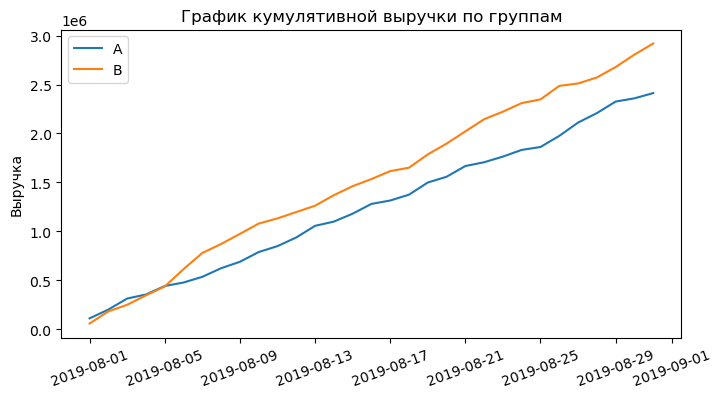

In [75]:
plt.figure(figsize=(8,4))
# график выручки группы А
plt.plot(cumulative_revenue_a['date'], cumulative_revenue_a['revenue'], label='A')
# график выручки группы B
plt.plot(cumulative_revenue_b['date'], cumulative_revenue_b['revenue'], label='B')

plt.title('График кумулятивной выручки по группам')
plt.ylabel('Выручка')
plt.xticks(rotation=20)
plt.legend()
plt.show()

Вывод: лидер по выручке - группа B. Данная группа имеет более выраженную позитивную динамику.

**Кумулятивный средний чек**

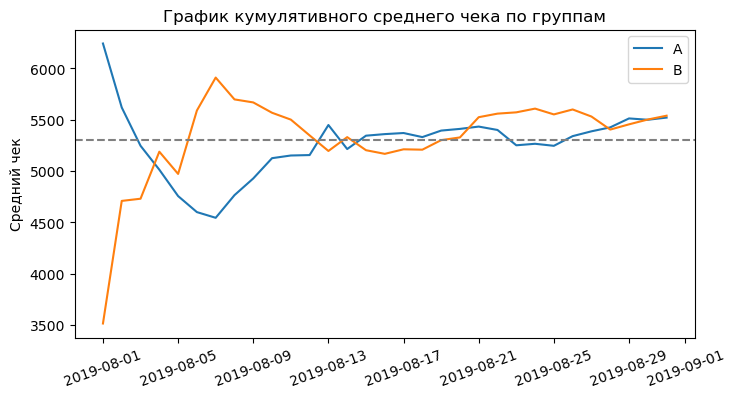

In [76]:
plt.figure(figsize=(8,4))
# график чека группы А
plt.plot(cumulative_revenue_a['date'], 
         cumulative_revenue_a['revenue']/cumulative_revenue_a['orders'], label='A')
# график чека группы В
plt.plot(cumulative_revenue_b['date'], 
         cumulative_revenue_b['revenue']/cumulative_revenue_b['orders'], label='B')

plt.axhline(y=5300, color='grey', linestyle='--')

plt.title('График кумулятивного среднего чека по группам')
plt.ylabel('Средний чек')
plt.xticks(rotation=20)
plt.legend()
plt.show()

Вывод: в районе 13.08.2019 графики начали стабилизироваться, выраженных отличий в среднем чеке нет, присутствует слабая положительная динамика в обеих группах.

**Относительное изменение кумулятивного среднего чека**

In [77]:
# кумулятивные данные по выручке и заказам для каждой группы
merged_cumulative_revenue = cumulative_revenue_a.merge(
    cumulative_revenue_b, on='date', suffixes=['_a', '_b'])

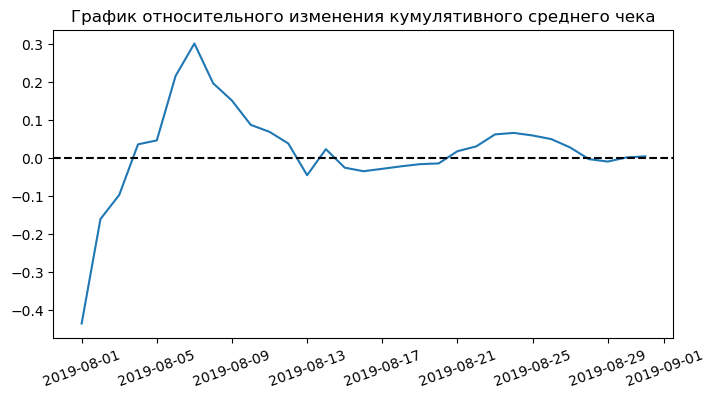

In [78]:
plt.figure(figsize=(8,4))
# график отношения средних чеков (B к A)
plt.plot(merged_cumulative_revenue['date'], 
         (merged_cumulative_revenue['revenue_b']/merged_cumulative_revenue['orders_b']) /
         (merged_cumulative_revenue['revenue_a']/merged_cumulative_revenue['orders_a']) -1)
# добавляем ось X
plt.axhline(y=0, color='black', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего чека')
plt.xticks(rotation=20)
plt.show()

Вывод: после стабилизации график относительного изменения кумулятивного среднего чека колеблется около нуля. 

**Кумулятивное среднее количество заказов на посетителя**

In [79]:
# добавим в cumulative_date столбец со значениями кумулятивного среднего количества заказов 
#на посетителя
cumulative_data['ord/vis_rate'] = cumulative_data['orders']/cumulative_data['visitors']

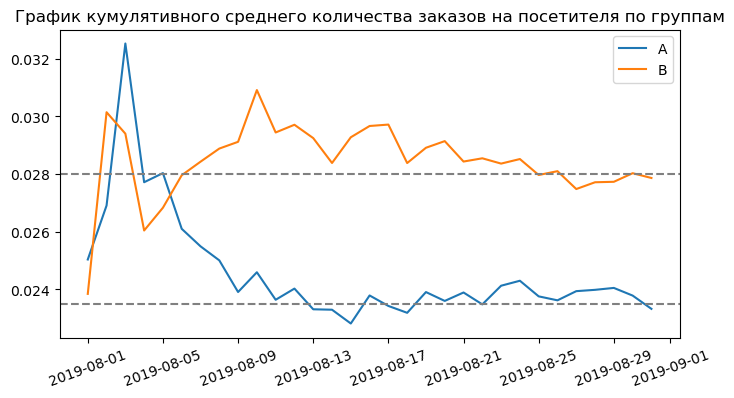

In [80]:
# строим график
plt.figure(figsize=(8,4))
plt.plot(cumulative_data[cumulative_data['group']=='A']['date'], 
         cumulative_data[cumulative_data['group']=='A']['ord/vis_rate'], label='A')
plt.plot(cumulative_data[cumulative_data['group']=='B']['date'], 
         cumulative_data[cumulative_data['group']=='B']['ord/vis_rate'], label='B')

plt.axhline(y=0.0235, color='gray', linestyle='--')
plt.axhline(y=0.028, color='gray', linestyle='--')

plt.title('График кумулятивного среднего количества заказов на посетителя по группам')
plt.xticks(rotation=20)
plt.legend()
plt.show()

Вывод: графики стабилизировались на показателях около 0,0235 заказа на посетителя в группе A и 0,028 заказа на посетителя в группе B.

После удаления аномальных пользователей значения снизились в пределах 0,002 заказов на посетителя.

**Относительное изменение кумулятивного среднего количества заказов на посетителя**

In [81]:
# кумулятивные данные по среднему числу заказов на посетителя для каждой группы
merged_cumulative_o_v_rate = cumulative_data[cumulative_data['group']=='A'][['date', 'ord/vis_rate']].merge(
    cumulative_data[cumulative_data['group']=='B'][['date', 'ord/vis_rate']], on='date', suffixes=['_a', '_b'])

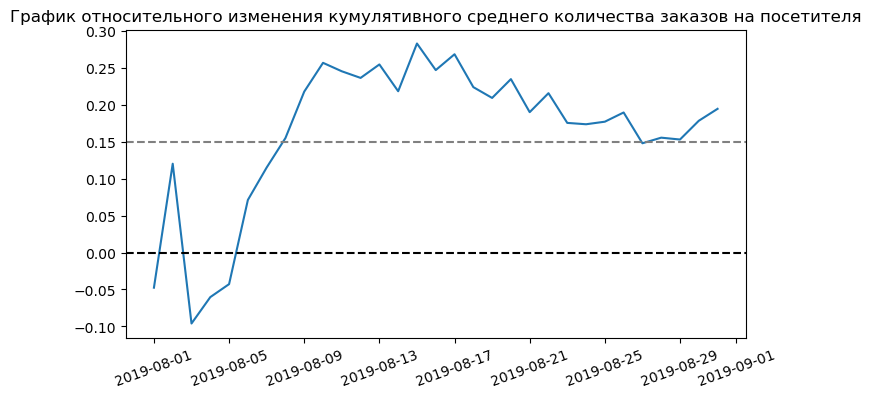

In [82]:
plt.figure(figsize=(8,4))
# график отношения кумулятивного среднего количества заказов на посетителя (B к A)
plt.plot(merged_cumulative_o_v_rate['date'], 
         merged_cumulative_o_v_rate['ord/vis_rate_b']/
         merged_cumulative_o_v_rate['ord/vis_rate_a'] -1)

plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y=0.15, color='gray', linestyle='--')

plt.title('График относительного изменения кумулятивного среднего количества заказов на посетителя')
plt.xticks(rotation=20)
plt.show()

Вывод: в начале теста группа B проигрывала, но затем вырвалась вперед и сохраняет лидерство, превосходя группу A на более чем 15%. После плавного снижения показателя до значения 0,15 наметился разворот.

После удаления аномальных пользавателей относительные показатели группы B увеличелись примерно на 5%.

### Решение по результатам теста

В полученных по результатам A/B-теста данных присутствуют 58 пользователей, попавших сразу в обе группы.

Численность групп в исходных данных отличается на 14%, после удаления вышеуказанных пользователей и аномальных пользователей разница в численности групп достигла 16,83%.

Данные факты говорят о необходимости проведения A/A-тестов в целях совершенствования механизма проведения A/B-тестов.

По результатам проведенного A/B-теста установлено следующее:
- по показателю кумулятивной выручки лидирует группа B;
- показатель кумулятивного среднего чека показываят слабую положительную динамику в обеих группах;
- статистически значимых отличий в среднем чеке между группами нет, относительное различие 0,33%;
- по показателю среднего количества заказов на посетителя группа B превосходит группу A на 19%, что является статистически значимым.

Таким образом, группа B превосходит группу A на 19% по показателю среднего количества заказов на посетителя при аналогичном среднем чеке, что положительно сказываятся на выручке.

Учитывая вышеописанные результаты и стабильность графиков, можно остановить тест, зафиксировав победу группы B.